In [139]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
pd.options.display.float_format ='{:,.3f}'.format

In [ ]:
data = pd.read_csv('hack_data.csv', delimiter=',', encoding='utf-8')

In [ ]:
data_subsample = data[['Network length',
                       'Stations',
                       'Lines',
                       'Avg. station distance',
                       'Avg. line length',
                       'Daily ridership',
                       'Population']]
data_subsample.head()

,Network length,Stations,Lines,Avg. station distance,Avg. line length,Daily ridership,Population
0,632.1,394,15,1668.0,42.1,6240000.0,15000000.0
1,572.0,344,20,1765.0,28.6,6740000.0,11100000.0
2,402.0,270,11,1552.0,36.5,3210000.0,8570000.0
3,386.0,229,13,1787.0,29.7,5000000.0,8830000.0
4,380.2,473,27,852.0,14.1,4530000.0,19000000.0


In [ ]:
data_subsample.dtypes

Network length           float64
Stations                   int64
Lines                      int64
Avg. station distance    float64
Avg. line length         float64
Daily ridership          float64
Population               float64
dtype: object

In [ ]:
data_subsample.isna().sum()

Network length            0
Stations                  0
Lines                     0
Avg. station distance     0
Avg. line length          1
Daily ridership          92
Population               67
dtype: int64

In [63]:
metro_df = data_subsample.dropna()

In [64]:
N = len(metro_df.index)

In [ ]:
columns = ['Network length', 'Stations', 'Lines', 'Avg. station distance', 'Avg. line length', 'Daily ridership', 'Population']

In [ ]:
def reduce_tails(feature):
    q1, q3 = np.percentile(feature, [25, 75])
    dfce = q3 - q1
    bottom_border, top_border = q1 - 1.5*dfce, q3 + 1.5*dfce
    feature = feature[feature > bottom_border]
    feature = feature[feature < top_border]
    return feature

# Step 1. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV

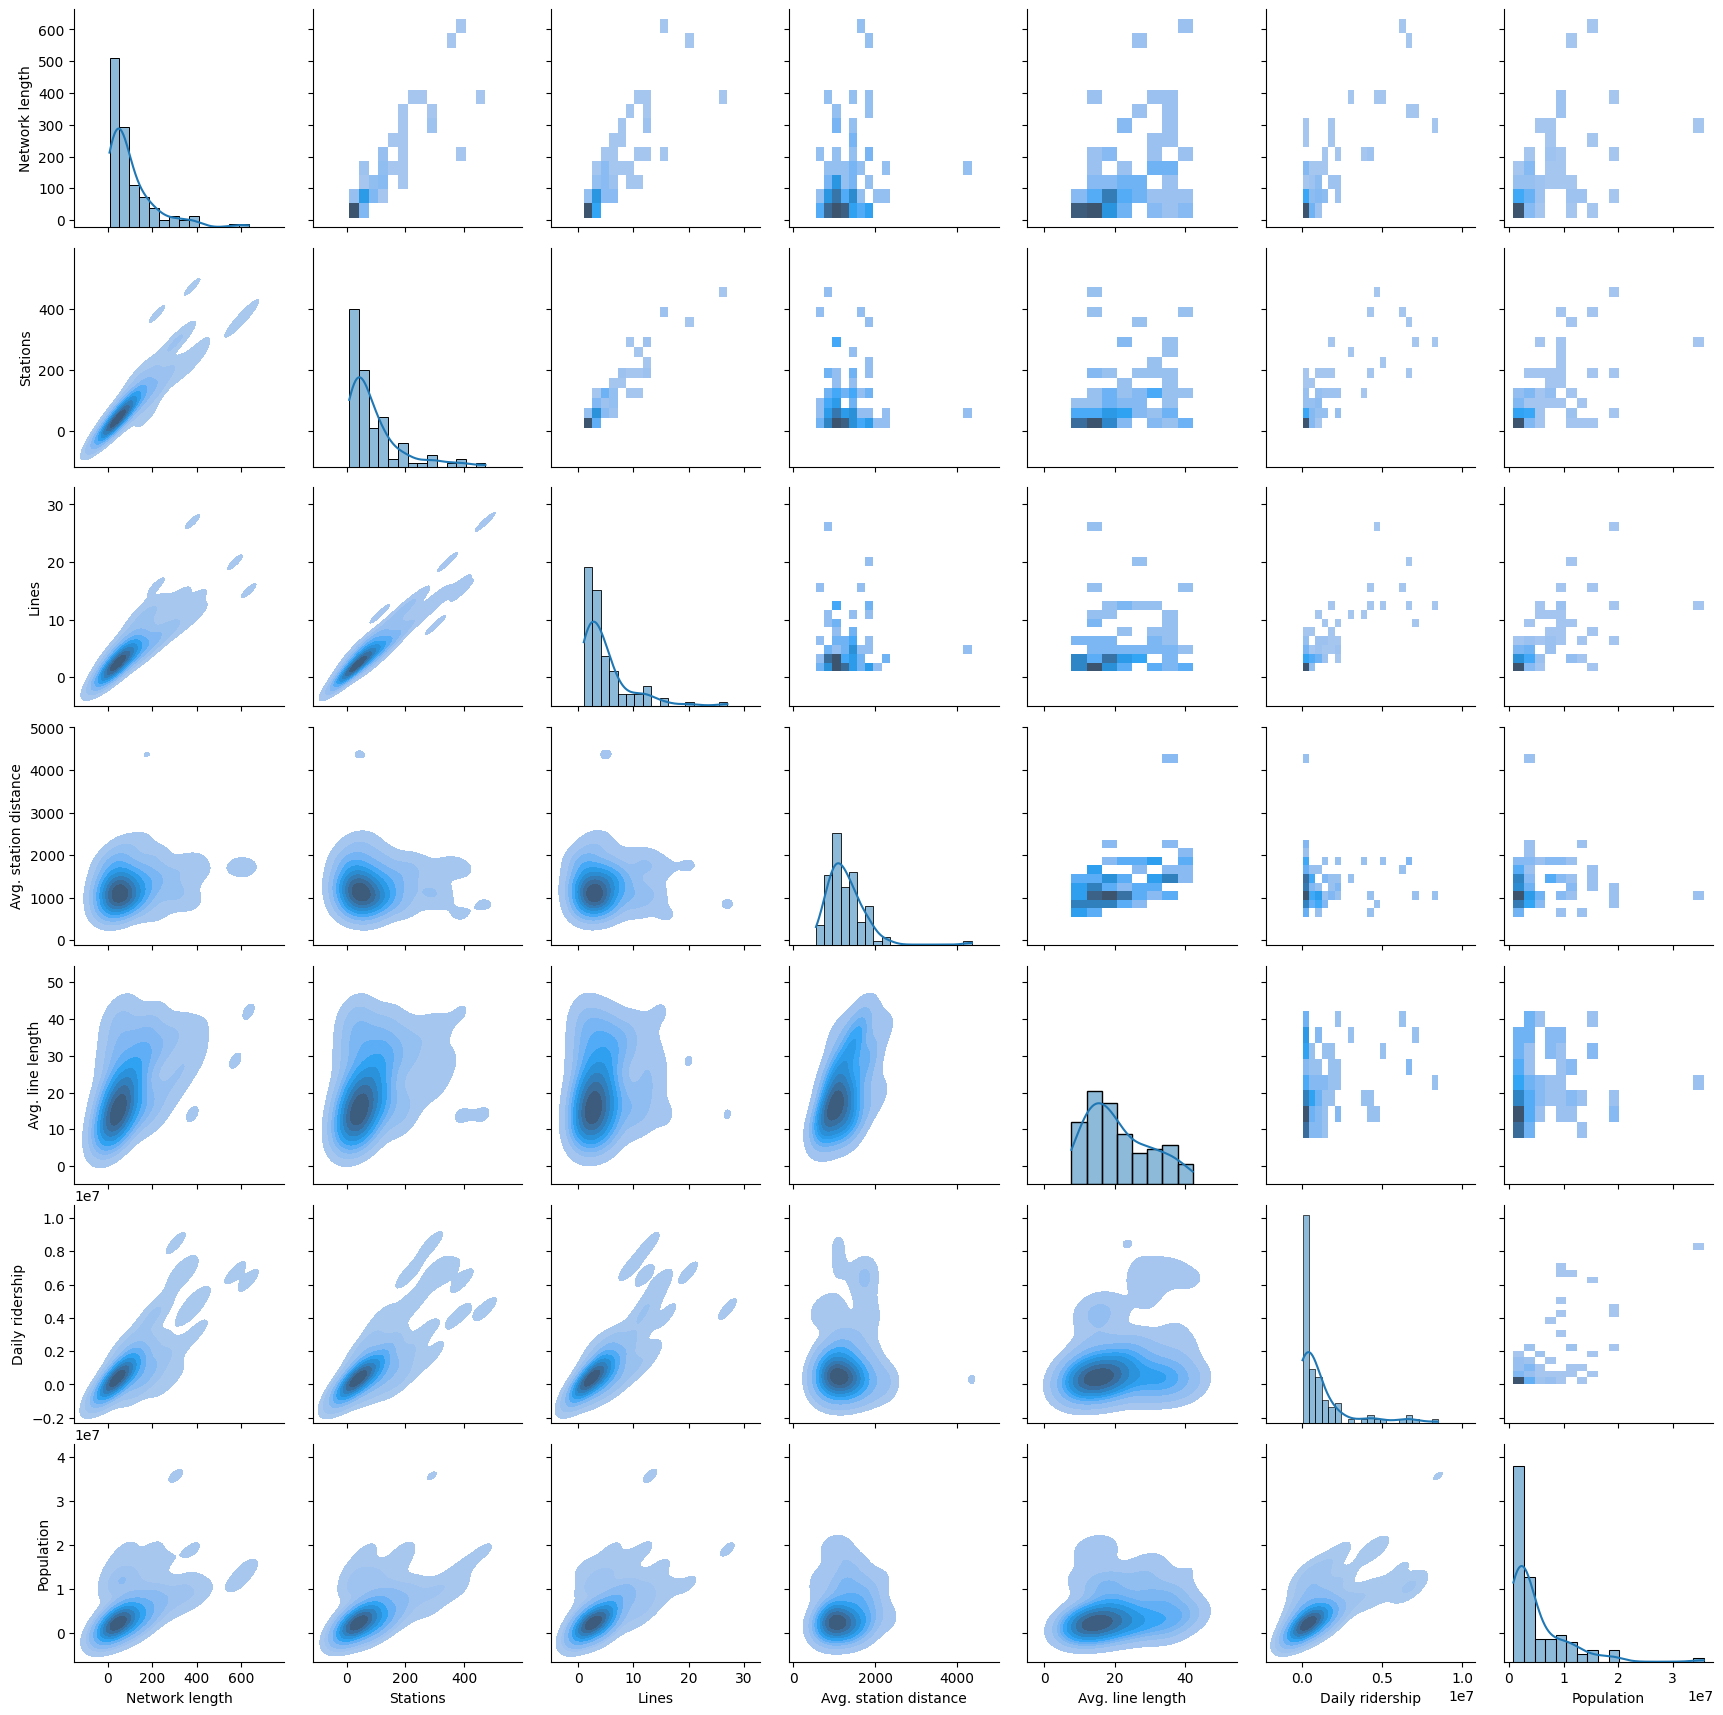

In [65]:
grid = sns.PairGrid(metro_df, vars=columns)
grid.map_upper(sns.histplot)
grid.map_lower(sns.kdeplot, fill=True)
grid.map_diag(sns.histplot, kde=True)

# Step 2. You need to make an estimation of multivariate mathematical expectation and variance.

In [69]:
display(metro_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Network length,106.000,105.199,114.340,7.700,31.575,66.100,139.000,632.100
Stations,106.000,88.934,90.453,9.000,30.000,58.500,113.000,473.000
Lines,106.000,4.736,4.317,1.000,2.000,3.000,5.750,27.000
Avg. station distance,106.000,"1,275.585",475.644,555.000,988.250,"1,166.000","1,481.500","4,365.000"
Avg. line length,106.000,21.016,9.037,7.700,13.725,18.550,27.975,42.100
Daily ridership,106.000,"1,098,961.321","1,676,549.159","16,400.000","175,750.000","393,500.000","1,145,000.000","8,500,000.000"
Population,106.000,"4,968,773.585","5,329,602.094","810,000.000","1,657,500.000","2,875,000.000","6,455,000.000","35,700,000.000"


In [70]:
metro_df[columns].mean()

Network length                105.199
Stations                       88.934
Lines                           4.736
Avg. station distance       1,275.585
Avg. line length               21.016
Daily ridership         1,098,961.321
Population              4,968,773.585
dtype: float64

In [68]:
metro_df[columns].var()

Network length                      13,073.660
Stations                             8,181.681
Lines                                   18.634
Avg. station distance              226,236.912
Avg. line length                        81.665
Daily ridership          2,810,817,081,251.573
Population              28,404,658,481,581.305
dtype: float64

# Step 3. You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

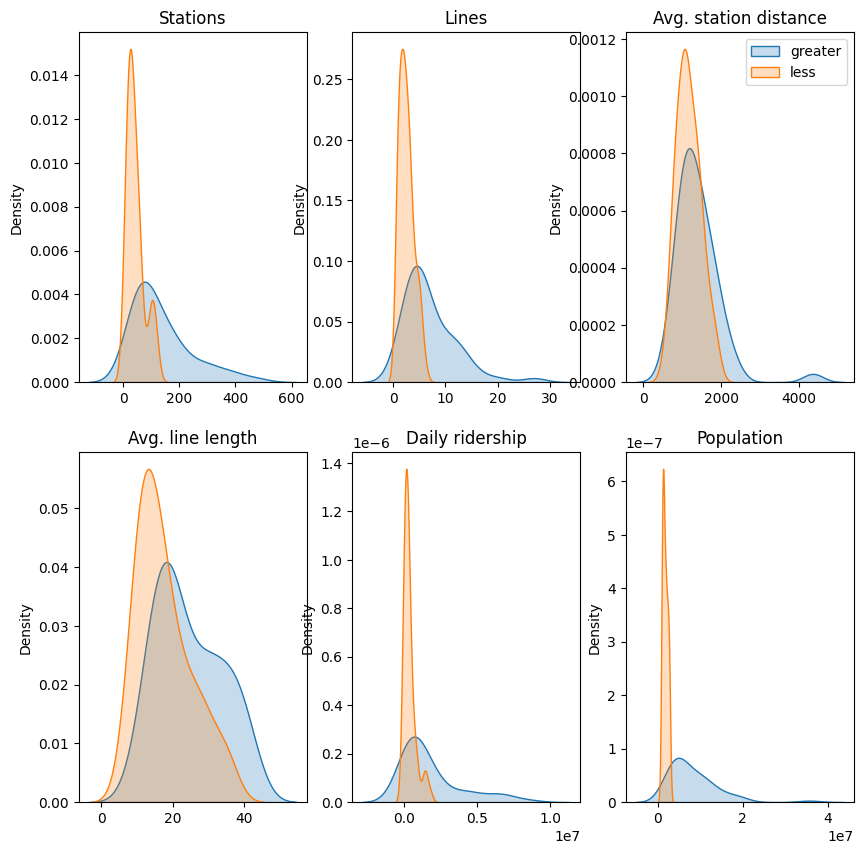

In [85]:
warnings.filterwarnings(action='ignore')
data_b = metro_df[columns]
data_b['median'] = np.where(data_b['Population']>=data_b['Population'].median(), 'g', 'l')
fig = plt.subplots(2, 3, figsize = (10, 10))
for i, col in enumerate(data_b.columns.tolist()[1:-1]):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data_b.loc[data_b['median'] == 'g', col], shade = True, label = 'greater')
    sns.kdeplot(data_b.loc[data_b['median'] == 'l', col], shade = True, label = "less")
    plt.xlabel('')
    plt.title(col)
    if i == 2:
        plt.legend(loc = 'upper right', fontsize = 10)
    else:
        plt.legend().remove()

plt.show()

In [91]:
print("Greater than median:")
greater_data = data_b.loc[data_b['median'] == 'g']
print("\nMean:")
greater_data.mean()

Greater than median:

Mean:


Network length                166.177
Stations                      135.151
Lines                           6.981
Avg. station distance       1,393.000
Avg. line length               24.453
Daily ridership         1,828,820.755
Population              8,239,245.283
dtype: float64

In [97]:
print('Variance:')
greater_data.var()

Variance:


Network length                      17,761.385
Stations                            11,225.823
Lines                                   25.519
Avg. station distance              333,632.654
Avg. line length                        84.218
Daily ridership          4,422,643,308,214.804
Population              35,204,168,650,217.703
dtype: float64

In [94]:
print("Less than median:")
less_data = data_b.loc[data_b['median'] == 'l']
print("\nMean:")
less_data.mean()

Less than median:

Mean:


Network length                 44.221
Stations                       42.717
Lines                           2.491
Avg. station distance       1,158.170
Avg. line length               17.579
Daily ridership           369,101.887
Population              1,698,301.887
dtype: float64

In [98]:
print('Variance:')
less_data.var()

Variance:


Network length                    1,057.632
Stations                            940.707
Lines                                 1.832
Avg. station distance            95,089.028
Avg. line length                     56.604
Daily ridership         167,167,180,957.910
Population              348,037,445,573.295
dtype: float64

# Step 4. You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

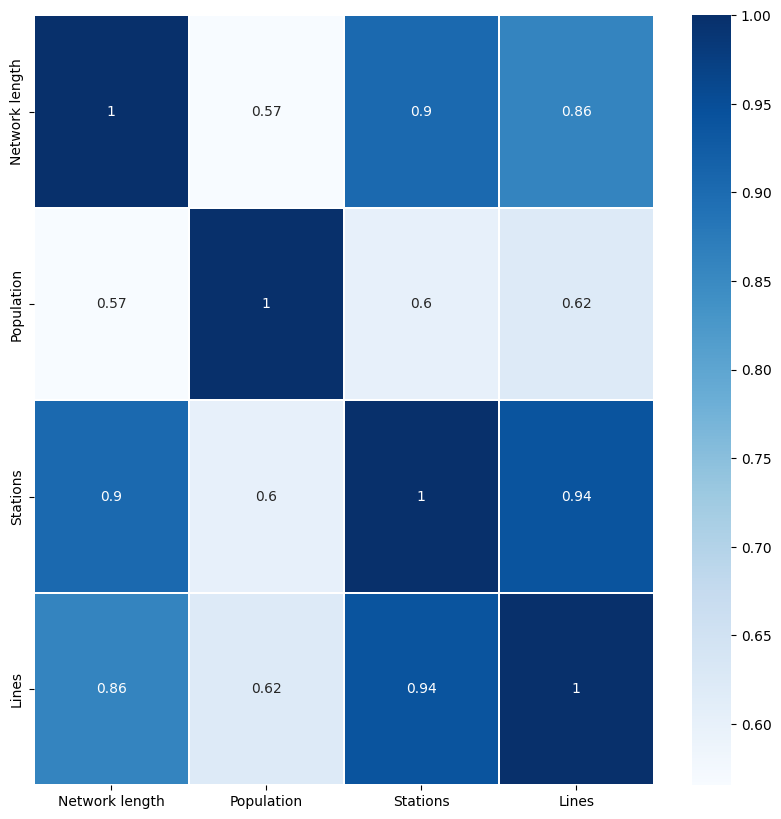

In [101]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(metro_df[['Network length', 'Population', 'Stations', 'Lines']].corr(), cmap='Blues', annot=True, linewidths=0.25)
plt.show()

In [116]:
def estimate(x, y):
    r, pvalue = st.pearsonr(x, y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    alpha = 0.05
    z = st.norm.ppf(1-alpha/2)
    low_z, high_z = r_z-z*se, r_z+z*se
    low, high = np.tanh((low_z, high_z))
    print('Correlation Coefficient: {:.3f} \nSignificance Level: {:.3f}\nConfidence Interval: ({:.3f}, {:.3f})'.format(r, pvalue, low, high))

In [117]:
print("Network length and Population")
estimate(metro_df['Network length'], metro_df['Population'])

Network length and Population
Correlation Coefficient: 0.565 
Significance Level: 0.000
Confidence Interval: (0.420, 0.683)


In [118]:
print("Network length and Stations")
estimate(metro_df['Network length'], metro_df['Stations'])

Network length and Stations
Correlation Coefficient: 0.905 
Significance Level: 0.000
Confidence Interval: (0.863, 0.934)


In [119]:
print("Network length and Lines")
estimate(metro_df['Network length'], metro_df['Lines'])

Network length and Lines
Correlation Coefficient: 0.860 
Significance Level: 0.000
Confidence Interval: (0.800, 0.903)


# Step 5. Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).

In [120]:
metro_df.corr()['Daily ridership'][:]

Network length          0.800
Stations                0.796
Lines                   0.785
Avg. station distance   0.042
Avg. line length        0.231
Daily ridership         1.000
Population              0.700
Name: Daily ridership, dtype: float64

In [124]:
metro_df['Avg. station distance']

0     1,668.000
1     1,765.000
2     1,552.000
3     1,787.000
4       852.000
         ...   
177   1,344.000
180   1,289.000
181     743.000
182   1,293.000
192     962.000
Name: Avg. station distance, Length: 106, dtype: float64

In [125]:
metro_df_reg = metro_df.drop(columns=['Avg. station distance'])

In [126]:
metro_df_reg.head()

,Network length,Stations,Lines,Avg. line length,Daily ridership,Population
0,632.100,394,15,42.100,"6,240,000.000","15,000,000.000"
1,572.000,344,20,28.600,"6,740,000.000","11,100,000.000"
2,402.000,270,11,36.500,"3,210,000.000","8,570,000.000"
3,386.000,229,13,29.700,"5,000,000.000","8,830,000.000"
4,380.200,473,27,14.100,"4,530,000.000","19,000,000.000"


# Step 6. Build regression model and make an analysis of multicollinearity and regularization (if needed).

In [131]:
X_train, X_test, y_train, y_test = train_test_split(metro_df_reg[['Population','Network length', 'Stations', 'Lines', 'Avg. line length']],
                                                    metro_df_reg[['Daily ridership']],
                                                    test_size=0.25,
                                                    random_state=10)

In [134]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [140]:
predictions = lr.predict(X_test)

In [137]:
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Mean Absolute Error: {:.3f}'.format(mae))
print('R2 Score: {:.3f}'.format(r2))
print('Coefficients:', lr.coef_)

Mean Absolute Error: 419324.102
R2 Score: 0.874
Coefficients: [[ 1.17436611e-01  7.57872459e+03  7.19533804e+03 -1.04979687e+05
  -3.43557804e+04]]


In [142]:
lasso_reg = Lasso(alpha=1, random_state=0)
lasso_reg.fit(X_train, y_train)
predictions2 = lasso_reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions2)
r2 = r2_score(y_test, predictions2)
print('Mean Absolute Error: {:.3f}'.format(mae))
print('R2 Score: {:.3f}'.format(r2))

Mean Absolute Error: 419324.039
R2 Score: 0.874


In [148]:
ridge_reg = Lasso(alpha=1, random_state=0)
ridge_reg.fit(X_train, y_train)
predictions3 = ridge_reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions3)
r2 = r2_score(y_test, predictions3)
print('Mean Absolute Error: {:.3f}'.format(mae))
print('R2 Score: {:.3f}'.format(r2))

Mean Absolute Error: 419324.039
R2 Score: 0.874


# Step 7. Analyze the quality of regression model (distribution of residuals, determination coefficient).

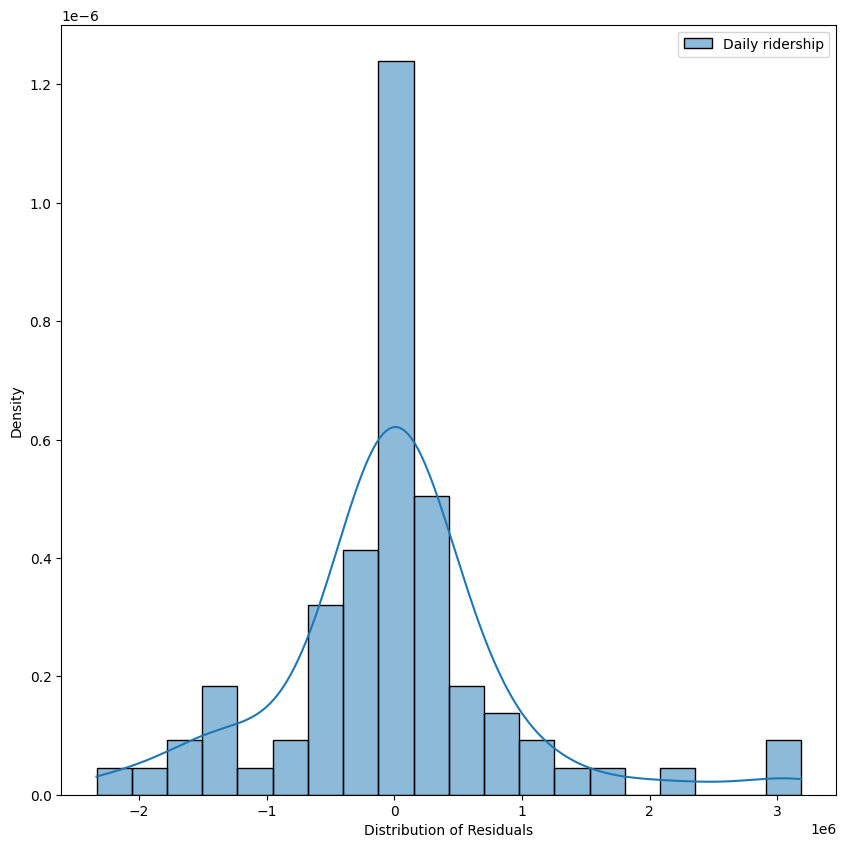

In [150]:
data_plot = y_train - lr.predict(X_train)
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
residuals = sns.histplot(data_plot, ax=ax, kde=True, stat='density')
residuals.set(xlabel='Distribution of Residuals')
plt.show()